## 이상치(극단치)
- 통상적인 범위에서 현실 불가능한 수치
- 1. 논리적으로 판단해서 정하는 법
- 2. 통계적인 기준을 이용해서 정하는 법 

In [1]:
import pandas as pd
import seaborn as sns

<AxesSubplot:ylabel='hwy'>

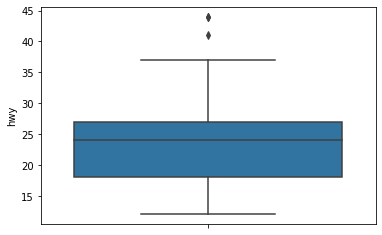

In [3]:
mpg = pd.read_csv('../mpg.csv')

sns.boxplot(data=mpg, y='hwy')

- 네모상자
> IQR
- 아랫수염 : 하위 0~25% 값
- Q1(1사분위수, 박스의 아랫변): 하위 25% 값
- Q2(2사분위수, 박스의 중간 변) : 하위 50% 값 (중앙값)
- Q3(3사분위수, 박스의 윗변) : 하위 75% 값
- 윗수염 : 하위 75~100% 값

> 극단치/이상치
- 경계를 넘어가는 점들
- 극단치 경계(양쪽 긴 변) : Q1, Q3 밖 1.5*IQR내 최대값
- 극단치 : Q1, Q3 밖 1.5*IQR 벗어난 값

### 1사분위수, 3사분위수 구하기 -> df.quantile()로 분위수 구함

In [5]:
pct25 = mpg['hwy'].quantile(.25)
pct25 

18.0

In [6]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [ ]:
# IQR = 3사분위수 - 1사분위수

In [8]:
iqr = pct75-pct25
iqr

9.0

### 상한, 하한 구하기
- 극단치의 경계
- 하한 : 1사분위수보다 IQR*1.5 더 작은 값
- 상한 : 3사분위수보다 IQR*1.5 더 큰 값

In [10]:
pct25 - 1.5*iqr # 하한

4.5

In [11]:
pct75 + 1.5*iqr # 상한

40.5

In [13]:
import numpy as np

In [16]:
## 극단치(이상치)를 결측 처리

mpg['hwy']=np.where((mpg['hwy']<4.5) | (mpg['hwy']>40.5), np.nan, mpg['hwy'])

In [22]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [20]:
mpg['hwy'].isna().sum() # 결측치 3개

3

In [21]:
# 결측치를 제거하고 분석
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


# pandas

In [28]:
df = pd.read_csv('../gapminder.tsv', sep='\t')

In [29]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [26]:
# 컬럼의 행과 열 확인
df.shape

(1704, 6)

In [27]:
# 컬럼만 추출
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [30]:
# 데이터타입
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

# 데이터 추출하기

## 1 열 단위 추출

In [31]:
df[['country']]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [32]:
df[['country','gdpPercap']] # 2개 이상은 리스트 안에 리스트

,country,gdpPercap
0,Afghanistan,779.445314
1,Afghanistan,820.853030
2,Afghanistan,853.100710
3,Afghanistan,836.197138
4,Afghanistan,739.981106
...,...,...
1699,Zimbabwe,706.157306
1700,Zimbabwe,693.420786
1701,Zimbabwe,792.449960
1702,Zimbabwe,672.038623


## 2 loc, iloc

### loc : 맨 왼쪽 기본 인덱스번호 행 데이터 추출

In [33]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [34]:
df.loc[1702] # loc은 왼쪽의 index 기준

country        Zimbabwe
continent        Africa
year               2002
lifeExp          39.989
pop            11926563
gdpPercap    672.038623
Name: 1702, dtype: object

In [35]:
# 인덱스 접근 변수에 대해 값을 할당하고 찾기
df_rows = df.shape[0] # df.shape[0]은 행
df_rows

1704

In [36]:
# 변수에 할당한 인덱스 추출
df_rows_new = df_rows - 50
df_rows_new

df.loc[df_rows_new]

country          Vietnam
continent           Asia
year                2002
lifeExp           73.017
pop             80908147
gdpPercap    1764.456677
Name: 1654, dtype: object

In [37]:
# 다양한 인덱스 추출
df.loc[0] # 하나

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [38]:
df.loc[[0,3,9,39]] # 여러 개는 인덱스 안에 인덱스

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
9,Afghanistan,Asia,1997,41.763,22227415,635.341351
39,Angola,Africa,1967,35.985,5247469,5522.776375


### iloc : 실제 행 번호 기준 데이터 추출

In [39]:
df_new = df.loc[[0,3,9,39]]

In [40]:
df_new

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
9,Afghanistan,Asia,1997,41.763,22227415,635.341351
39,Angola,Africa,1967,35.985,5247469,5522.776375


In [41]:
df_new.iloc[3] # 39 index, 3번 행

country           Angola
continent         Africa
year                1967
lifeExp           35.985
pop              5247469
gdpPercap    5522.776375
Name: 39, dtype: object

In [42]:
df_new.loc[39] 

country           Angola
continent         Africa
year                1967
lifeExp           35.985
pop              5247469
gdpPercap    5522.776375
Name: 39, dtype: object

In [45]:
df.loc[0:20,['year','pop']] # 앞은 행, 뒤는 열
# 0~20

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
5,1977,14880372
6,1982,12881816
7,1987,13867957
8,1992,16317921
9,1997,22227415


In [44]:
df.iloc[0:20,[2,3,4]] # iloc은 0~19

,year,lifeExp,pop
0,1952,28.801,8425333
1,1957,30.332,9240934
2,1962,31.997,10267083
3,1967,34.020,11537966
4,1972,36.088,13079460
5,1977,38.438,14880372
6,1982,39.854,12881816
7,1987,40.822,13867957
8,1992,41.674,16317921
9,1997,41.763,22227415


In [47]:
# Range 값을 넣어서 인덱스
a_range=list(range(5))

df.iloc[:, a_range] # iloc 안으로 적용

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460
...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418
1700,Zimbabwe,Africa,1992,60.377,10704340
1701,Zimbabwe,Africa,1997,46.809,11404948
1702,Zimbabwe,Africa,2002,39.989,11926563


In [48]:
b_range = list(range(0,6,2))

df.iloc[:, b_range]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563
